# Pre-Lab 4

## Reading

### Section 5.2

* The main source of error for integration in Python is **approximation error**.
* To find this error, we can create a taylor series for each slice, and add them together. The first term in the taylor series is what is calculated using the trapezoidal rule, and the rest are equal to the error.
    * The error is denoted O(h^n) where the series is truncated after the nth term
* Through cancelling out terms in the taylor exapansion, we can rearange the error formula into the Euler Maclauren formula.
* The first term in the **Euler-Maclauren formula** is epsilon = (1/12) * h^2 * [f'(a) - f'(b)]. The rest of the terms represent the rest of the even orders of h: h^4, H^6, ...
    * Usually if h is small, its pretty accurate to neglect the h^4 and higher terms.
* The rounding error is about C times the value of the integral, where the approximation constant C = 10^(-16) approximately.
* The integration reaches _macheine precision_ when N = 10^8 approximately. This means that the rounding error becomes bigger than the approximation error, so there is no need to have a larger N.
* For Simpson's rule epsilon = (1/90) * h^4 * [f'''(a) - f'''(b)]. 
* Using Simpson's rule, the integration reaches macheine precision around N = 10000.
* Simpson's rule noramlly give us a better approximation, but not always.

#### 5.2.1

* There is a trick for finding the error when you can't take the integral of the function.
    * First perform the integral, I1, with N1 slices.
    * Then do it again with N2 slices where N2 = 2N1 and get I2.
    * The error of the second integral is about equal to (1/3) * abs(I2 - I1).
    * For simpson's rule, epsilon = (1/15)(I2 - I1)

### Section 5.3

* Generally for integrals, we want to pick an accuracy that is no greater than what we need. 
* One way to acheive this is to start with a small N value and double it until we have acheived the desired accuracy.
    * We can calculate epsilon at each step using epsilon_i = (1/3) * (Ii - I(i-1))
* When we double N, we can consider the new set of points where the interval is segmented to be _nested_ inside the origional set. 
* To calculate a new esimate, Ii, with twice as many slices as the one before it, I(i-1) use the equation: Ii = (1/2) * I(i-1) + hi * sum(k odd)(f(a + k * hi))
* To find the appropriate N value, do this calculation multiple times, calcualting epsilon each time, until the desired epsilon is reached. 
* For simpson's rule: 
    * epsilon_i = (1/15) * (Ii - I(i-1))
    * Ii = hi * (1/3 * (f(a) + f(b) + 2 * sum(k even)(f(a + k * hi))) + 2 * sum(k odd)(f(a + k * hi)))

## Exercise 5.1 p. 143

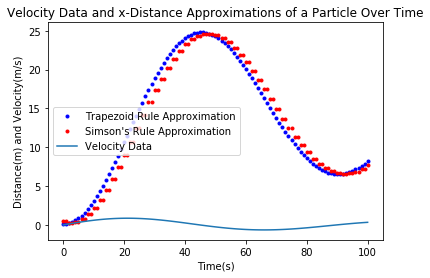

In [4]:
from pylab import loadtxt, plot, show, legend, title, xlabel, ylabel

data = loadtxt("velocities.txt")

time = data[: ,0] # time in seconds
velocity = data[: ,1] # x velocity of a particle in maters per second

# Trapezoidal Rule:
N = 100
h = int((time[len(time)-1] - time[0]) / N)

def trapezoidRule(t):
    """Calculates the position of a particle, approximated with the trapezoidal rule, as a function of time.
    
    Argements: time
    
    Returned: position approximated with the trapezoidal rule."""
    
    integralTrap = []
    for m in range(0,N+1):
        sumTrap = 0.5*velocity[0] + 0.5*velocity[len(velocity)-1]
        for i in range(1,int(t[m])):
            sumTrap += velocity[i*h]

        integralTrap.append(sumTrap * h)

    return integralTrap

# Simpson's Rule:

def simpsonRule(t):
    """Calculates the position of a particle, approximated with Simpson's rule, as a function of time.
    
    Argements: time
    
    Returned: position approximated with Simpson's rule."""
    
    integralSimp = []
    for n in range(0,N+1):
        sumSimp = velocity[0] + velocity[len(velocity)-1]
        for k in range(1,int(t[n]/2 - 1)):
            sumSimp += 4 * velocity[(2*k - 1) * h]
            sumSimp += 2 * velocity[2*k*h]

        sumSimp += 4 * velocity[(2*int(t[n]/2) - 1) * h]

        integralSimp.append(sumSimp * h * (1/3)) 
    
    return integralSimp

positionT = trapezoidRule(time)
positionS = simpsonRule(time)

title("Velocity Data and x-Distance Approximations of a Particle Over Time") 
xlabel("Time(s)")
ylabel("Distance(m) and Velocity(m/s)")

plot(time, positionT, "b.", label = "Trapezoid Rule Approximation")
plot(time, positionS,"r.", label = "Simson's Rule Approximation")
plot(time, velocity, label = "Velocity Data")

legend()
show()

This plot shows the velocity vs time and position vs time data for a moving particle. The solid line represents the origional velocity data, and the dots represent the position that was calcualted using two different methods of integration, the trapezoid rule, and Simpson's rule. We can see that this is consistant with the definition of displacement and velocity, because when the particle's position is sloped upwards, indicating that it is moving in the positive direction, the velocity is also positive. And when the particle is moving in the negative direction, the velocity is negative.

In [89]:
# Error analysis
N = 50
positionT1 = trapezoidRule(time)
positionS1 = simpsonRule(time)

N = 100
positionT2 = trapezoidRule(time)
positionS2 = simpsonRule(time)


errorT = (1/3) * abs(positionT2[100] - positionT1[50])
errorS = (1/15) * abs(positionS2[100] - positionS1[50])

print("Error for the Trapezoidal Rule is: ", errorT)
print("Error for Simpson's Rule is: ", errorS)

Error for the Trapezoidal Rule is:  5.35384466667
Error for Simpson's Rule is:  1.11642942222


## Exercise 5.3 p. 147

## Exercise 5.4 p. 148

## Exercise 5.9 p. 172